# In which Pittsburgh Neighborhood will you live the longest?

By: Samarth, Dailynn, Anisha

### Samarth's Notebook

## Introduction

My goal is to determine which neighborhood in Pittsburgh you will live the longest. The datset I used is the COVID-19 Vaccinations per neigborhood. Link: https://data.wprdc.org/dataset/allegheny-county-covid-19-vaccinations/resource/96cf8cdc-2b8e-43cb-b20b-443f236bcc60

I believe that the area with the highest COVID-19 vaccination rates shows us that more people are aware of the disease spreading and are taking action to protect themselves from it, lowering the chance of them getting it and spreading it. The higher the rate is, the better the neighborhood is to live in. 

### Cleaning the data

For the project, I did not want to use neighborhoods that have a very low population, because this would skew results and would not truly be an accurate representation of the overall neighborhoods. 

I removed neigborhoods that have a low partial + fully vaccinated population (under 10 people).

In [32]:
# Select rows where neighborhood_municipality is not McDonald or Trafford
df = df.loc[~df['neighborhood_municipality'].isin(['Mcdonald', 'Trafford'])]

# Reset the index
df = df.reset_index(drop=True)

## COVID Vaccinations per Neigborhood

***** For my dataset, I combined vaccinated and vaccinated with booster to show overall vaccination rates in neighborhoods *****

I first looked at all the top 5 neighborhoods with fully vaccinated people with booster shots:

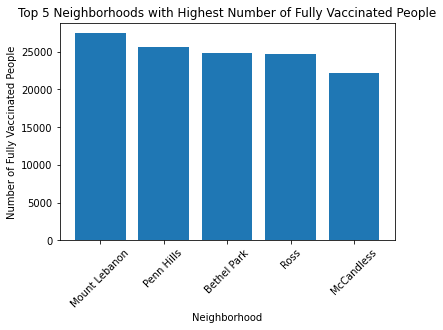

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('vaccinations.csv')

# Calculate the total number of fully vaccinated people with booster shots for each neighborhood
df['total_fully_vaccinated_w_booster'] = df['total_fully_vaccinated'] + df['total_fully_vaccinated_w_booster']
neighborhood_boosted = df[['neighborhood_municipality', 'total_fully_vaccinated_w_booster']].sort_values(by='total_fully_vaccinated_w_booster', ascending=False).head(5)

# Create a bar plot of the top 5 neighborhoods
plt.bar(neighborhood_boosted['neighborhood_municipality'], neighborhood_boosted['total_fully_vaccinated_w_booster'])

# Set the x-axis label and rotate the labels to be more readable
plt.xlabel('Neighborhood')
plt.xticks(rotation=45)

# Set the y-axis label
plt.ylabel('Number of Fully Vaccinated People')

# Set the plot title
plt.title('Top 5 Neighborhoods with Highest Number of Fully Vaccinated People')

# Show the plot
plt.show()

Penn Hills has the highest number of fully vaccinated people with booster shots. 

### Here is a Bar Graph of the Top 5 Lowest Number of Fully Vaccinated People with Booster Shots:

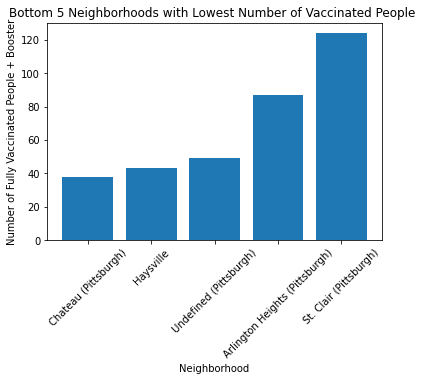

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('vaccinations.csv')

# Select rows where neighborhood_municipality is not McDonald or Trafford
df = df.loc[~df['neighborhood_municipality'].isin(['Mcdonald', 'Trafford'])]

# Reset the index
df = df.reset_index(drop=True)

# Calculate the total number of fully vaccinated people with booster shots for each neighborhood
df['total_fully_vaccinated_w_booster'] = df['total_fully_vaccinated'] + df['total_fully_vaccinated_w_booster']
lowest_vaccinations = df[['neighborhood_municipality', 'total_fully_vaccinated_w_booster']].sort_values(by='total_fully_vaccinated_w_booster').head(5)

# Create a bar plot of the lowest 5 neighborhoods
plt.bar(lowest_vaccinations['neighborhood_municipality'], lowest_vaccinations['total_fully_vaccinated_w_booster'])

# Set the x-axis label and rotate the labels to be more readable
plt.xlabel('Neighborhood')
plt.xticks(rotation=45)

# Set the y-axis label
plt.ylabel('Number of Fully Vaccinated People + Booster')

# Set the plot title
plt.title('Bottom 5 Neighborhoods with Lowest Number of Vaccinated People ')

# Show the plot
plt.show()


St. Clair has the lowest number of vaccinated people at a little over 120 people.

### I then realized that each neighborhood has different amount of people, so I needed to calculate the ratio of each population with booster shots.

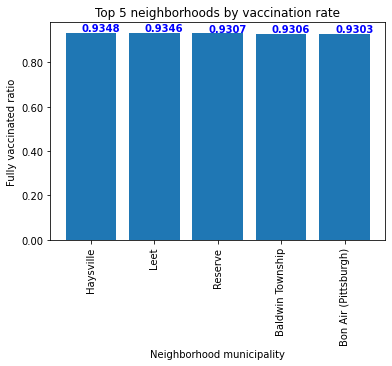

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

# Load the data from the CSV file
vaccinations = pd.read_csv('vaccinations.csv')

# Compute the fully vaccinated and boosted ratio
vaccinations['fully_vaccinated_and_boosted_ratio'] = (vaccinations['total_fully_vaccinated'] + vaccinations['total_fully_vaccinated_w_booster']) / (vaccinations['total_partially_vaccinated'] + vaccinations['total_fully_vaccinated'] + vaccinations['total_fully_vaccinated_w_booster'])

# Filter the neighborhoods with the highest ratio and plot them
top_5_vaccinations = vaccinations[vaccinations['fully_vaccinated_and_boosted_ratio'].notna()].sort_values('fully_vaccinated_and_boosted_ratio', ascending=False).iloc[1:6]

plt.bar(top_5_vaccinations['neighborhood_municipality'], top_5_vaccinations['fully_vaccinated_and_boosted_ratio'])
plt.xticks(rotation=90)
plt.ylabel('Fully vaccinated ratio')
plt.xlabel('Neighborhood municipality')
plt.title('Top 5 neighborhoods by vaccination rate')

# Set the format of the y-axis tick labels
formatter = ticker.FormatStrFormatter('%.2f')
plt.gca().yaxis.set_major_formatter(formatter)

# Add the ratio number over the bars
for i, v in enumerate(top_5_vaccinations['fully_vaccinated_and_boosted_ratio']):
    plt.text(i - 0.15, v + 0.005, str(round(v, 4)), color='blue', fontweight='bold')

plt.show()


The neighborhood with the highest ratio per vaccination per person is Haysville, with a rate of 0.9348.

#### Lowest vaccination rates for the bottom 5 neighborhoods in a list

In [2]:
import pandas as pd

# Load the data from the CSV file
vaccinations = pd.read_csv('vaccinations.csv')

# Compute the fully vaccinated and boosted ratio
vaccinations['fully_vaccinated_and_boosted_ratio'] = (vaccinations['total_fully_vaccinated'] + vaccinations['total_fully_vaccinated_w_booster']) / (vaccinations['total_partially_vaccinated'] + vaccinations['total_fully_vaccinated'] + vaccinations['total_fully_vaccinated_w_booster'])

# Filter the neighborhoods with the lowest ratio and create a list
bottom_10_vaccinations = vaccinations[vaccinations['fully_vaccinated_and_boosted_ratio'].notna() & (vaccinations['neighborhood_municipality'] != 'Mcdonald')].sort_values('fully_vaccinated_and_boosted_ratio', ascending=True).iloc[:10][['neighborhood_municipality', 'fully_vaccinated_and_boosted_ratio']]

# Set the format of the ratios
pd.options.display.float_format = '{:.4f}'.format

# Print the list of neighborhoods with their corresponding ratios
print('Bottom 10 neighborhoods by vaccination rate:')
print(bottom_10_vaccinations.to_string(index=False))


Bottom 10 neighborhoods by vaccination rate:
             neighborhood_municipality  fully_vaccinated_and_boosted_ratio
              South Shore (Pittsburgh)                              0.7227
        Northview Heights (Pittsburgh)                              0.7719
                Shadyside (Pittsburgh)                              0.7843
Central Business District (Pittsburgh)                              0.7885
            North Oakland (Pittsburgh)                              0.7895
        Arlington Heights (Pittsburgh)                              0.7909
          Central Oakland (Pittsburgh)                              0.7979
           Strip District (Pittsburgh)                              0.8024
                    Bluff (Pittsburgh)                              0.8031
                              Emsworth                              0.8058


The neighborhood with the lowest ratio per vaccination per person is South Shore, with a rate of 0.7227.

# Conclusion

#### After creating data visualizations and viewing the COVID-19 vaccination per neighborhood data, I can deduce that:

The best neighborhood to live in according to COVID-19 vaccination data is Haysville: 0.9348. 

The worst neighborhood to live in according to COVID-19 vaccination data is South Shore: 0.7227.

The difference between the two ratios is 0.9348 - 0.7227 = 0.2121.

### Anisha's Notebook

Introduction:

The data I will be using is "Median Age at Death 2011-15 by Municipality in Allegheny County" I plan to create a data table to represent the the neighborhood including their white deaths, black deaths, total deaths, and total median age at death. By comparing the total deaths within each neighborhood we can identify which neighborhood is most suitable to live in. The number of white and black deaths can be compared to show variety in the dataset. The median death age shows how far in age someone can live up to. 

In [11]:
import pandas as pd

# Create a list of dictionaries containing data
data = [
    {"Muniplicity": "Glassport Borough", "White Deaths": 321, "Black Deaths": 4, "Total Deaths": 326, "Total Median Age at Death": 76.7},
    {"Muniplicity": "Etna Borough", "White Deaths": 205, "Black Deaths": 1, "Total Deaths": 207, "Total Median Age at Death": 76.5},
    {"Muniplicity": "Thornburg Borough", "White Deaths": 19, "Black Deaths": 1, "Total Deaths": 20, "Total Median Age at Death": 80},
    {"Muniplicity": "Pennsbury Village Borough", "White Deaths": 17, "Black Deaths": 1, "Total Deaths": 18, "Total Median Age at Death": 73},
    {"Muniplicity": "Trafford Borough", "White Deaths": 5, "Black Deaths": 0, "Total Deaths": 5, "Total Median Age at Death": 80},
    {"Muniplicity": "Haysville Borough", "White Deaths": 5, "Black Deaths": 0, "Total Deaths": 5, "Total Median Age at Death": 77.5},
]

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(data)

# Save the DataFrame as a CSV file
df.to_csv("my_dataset.csv", index=False)


In [12]:
import pandas as pd

# Load the CSV dataset into a Pandas DataFrame
df = pd.read_csv("my_dataset.csv")

# Display the DataFrame
print(df)

                 Muniplicity  White Deaths  Black Deaths  Total Deaths  \
0          Glassport Borough           321             4           326   
1               Etna Borough           205             1           207   
2          Thornburg Borough            19             1            20   
3  Pennsbury Village Borough            17             1            18   
4           Trafford Borough             5             0             5   
5          Haysville Borough             5             0             5   

   Total Median Age at Death  
0                       76.7  
1                       76.5  
2                       80.0  
3                       73.0  
4                       80.0  
5                       77.5  


This can help us predict whether the neighborhood is safe, compliant, and convience. Figuring out the total deaths can help us predict more about the neighborhood. The total deaths can determine whether it is a safe area, and these things are important to decide whether a neighborhood is the "better area" to live in. 

I also created a bar graph to help represent the data visually considering the total deaths.

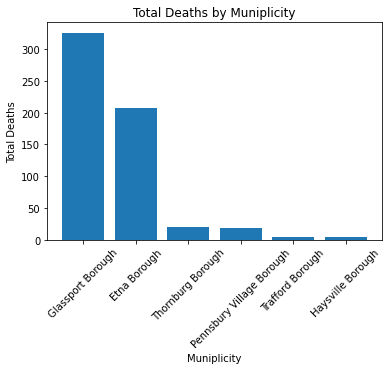

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv("my_dataset.csv")
plt.xticks(rotation=45)

# Create a bar plot
plt.bar(df["Muniplicity"], df["Total Deaths"])

# Add labels and title
plt.xlabel("Muniplicity")
plt.ylabel("Total Deaths")
plt.title("Total Deaths by Muniplicity")

# Display the plot
plt.show()

According to the data the best neighborhood to live in would be Tarfford Village Borough, originally both Pennsbury and Trafford had the same amount of total deaths but there was a slight difference for the median age at death. Pennsbury had 77.5 which was lower than 80, meaning you would live longer in Trafford.

However another dataset to consider would be the median age. Trafford Village Borough may have the highest median age out of these neighborhoods, however these neighborhoods have higher median ages yet the total deaths are varied.

In [16]:
import pandas as pd

# Create a list of dictionaries containing data
data = [
    {"Muniplicity": "Trafford Borough", "Total Median Age at Death": 80},
    {"Muniplicity": "Leetsdale Borough", "Total Median Age at Death": 84.3},
    {"Muniplicity": "Aleppo Township", "Total Median Age at Death": 88.3},
    {"Muniplicity": "Churchill Borough", "Total Median Age at Death": 85.1},
    {"Muniplicity": "South Fayette Township", "Total Median Age at Death": 85.6},
    {"Muniplicity": "Upper St. Clair Township", "Total Median Age at Death": 85.9},
]

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(data)

# Save the DataFrame as a CSV file
df.to_csv("my_dataset2.csv", index=False)

# Load the CSV dataset into a Pandas DataFrame
df = pd.read_csv("my_dataset2.csv")

# Display the DataFrame
print(df)

                Muniplicity  Total Median Age at Death
0          Trafford Borough                       80.0
1         Leetsdale Borough                       84.3
2           Aleppo Township                       88.3
3         Churchill Borough                       85.1
4    South Fayette Township                       85.6
5  Upper St. Clair Township                       85.9


According to this data of the top 5 highest median age at deaths, we can see the highest median at age is 88.3 at Aleppo Township. However, to find the most accurate result for which neighborhood to live in we have to consider the total deaths, and total median age combined. By combining both pieces of information we can get

In [18]:
import pandas as pd

# Create a list of dictionaries containing data
data = [
    {"Muniplicity": "Leetsdale Borough", "Total Median Age at Death": 84.3, "White Deaths": 56, "Black Deaths": 2, "Total Deaths": 58},
    {"Muniplicity": "Aleppo Township", "Total Median Age at Death": 88.3, "White Deaths": 204, "Black Deaths": 2, "Total Deaths": 206},
    {"Muniplicity": "Churchill Borough", "Total Median Age at Death": 85.1, "White Deaths": 167, "Black Deaths": 23, "Total Deaths": 190},
    {"Muniplicity": "South Fayette Township", "Total Median Age at Death": 85.6, "White Deaths": 789, "Black Deaths": 12, "Total Deaths": 801},
    {"Muniplicity": "Upper St. Clair Township", "Total Median Age at Death": 85.9, "White Deaths": 904, "Black Deaths": 5, "Total Deaths": 909},
    {"Muniplicity": "Glassport Borough", "Total Median Age at Death": 76.7, "White Deaths": 321, "Black Deaths": 4, "Total Deaths": 326},
    {"Muniplicity": "Etna Borough", "Total Median Age at Death": 76.5, "White Deaths": 205, "Black Deaths": 1, "Total Deaths": 207},
    {"Muniplicity": "Thornburg Borough", "Total Median Age at Death": 80, "White Deaths": 19, "Black Deaths": 1, "Total Deaths": 20},
    {"Muniplicity": "Pennsbury Village Borough", "White Deaths": 17, "Black Deaths": 1, "Total Deaths": 18, "Total Median Age at Death": 73},
    {"Muniplicity": "Trafford Borough", "Total Median Age at Death": 80, "White Deaths": 5, "Black Deaths": 0, "Total Deaths": 5},
    {"Muniplicity": "Haysville Borough", "Total Median Age at Death": 77.5, "White Deaths": 5, "Black Deaths": 0, "Total Deaths": 5},
]

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(data)

# Save the DataFrame as a CSV file
df.to_csv("my_dataset3.csv", index=False)

# Load the CSV dataset into a Pandas DataFrame
df = pd.read_csv("my_dataset3.csv")

# Display the DataFrame
print(df)

                  Muniplicity  Total Median Age at Death  White Deaths  \
0           Leetsdale Borough                       84.3            56   
1             Aleppo Township                       88.3           204   
2           Churchill Borough                       85.1           167   
3      South Fayette Township                       85.6           789   
4    Upper St. Clair Township                       85.9           904   
5           Glassport Borough                       76.7           321   
6                Etna Borough                       76.5           205   
7           Thornburg Borough                       80.0            19   
8   Pennsbury Village Borough                       73.0            17   
9            Trafford Borough                       80.0             5   
10          Haysville Borough                       77.5             5   

    Black Deaths  Total Deaths  
0              2            58  
1              2           206  
2           

Now to display this the total deaths as a bar graph:

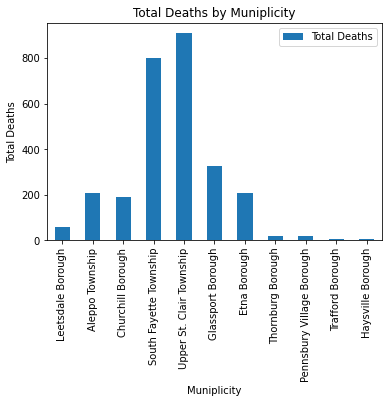

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV dataset into a Pandas DataFrame
df = pd.read_csv("my_dataset3.csv")

# Create a bar chart of Total Deaths by Muniplicity
df.plot(kind="bar", x="Muniplicity", y="Total Deaths")

# Set the chart title and axis labels
plt.title("Total Deaths by Muniplicity")
plt.xlabel("Muniplicity")
plt.ylabel("Total Deaths")

# Display the chart
plt.show()

And lastly the total median age at death:

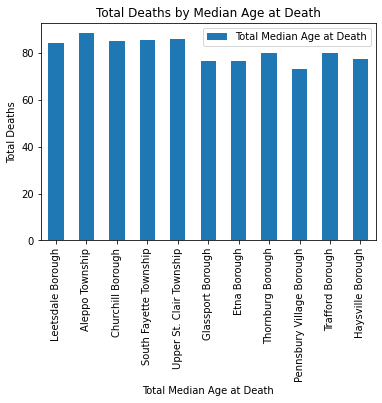

In [21]:
import matplotlib.pyplot as plt

# Generate the bar graph
df.plot(kind="bar", x="Muniplicity", y="Total Median Age at Death")

# Set the title and labels
plt.title("Total Deaths by Median Age at Death")
plt.xlabel("Total Median Age at Death")
plt.ylabel("Total Deaths")

# Show the graph
plt.show()

Top 5 Total Deaths were (least number of deaths):
- Trafford Borough
- Haysville Borough
- Pennsbury Village Borough
- Thornburg Borough
- Leetsdale Borough

Top 5 Median Age in Death were (high number):
- Aleppo Township
- Upper St Clair Township
- South Fayette Township
- Churchill Borough
- Leetsdale Borough

As shown in the final results Leetsdale Borough has appeared in the top 5 of both datasets. It's best to consider both the total deaths and median age in death when considering which neighborhood to live in. You want to live in a place where there is not many deaths around and people live longer. It's best not to consider one dataset over the other, the best conclusion is the consider both and determine which neighbhood would fit best in both catagories. As shown Leetsdale Borough appeared in both making it safer and most likely 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Dailynn Personal Notebook

**Introduction**

    For my dataset to answer this question, I chose the police incident data from the WRDC Pittsburgh website that dates all the way back from 2016 until now which contained about 600,000 rows of data. Individuals will most likely live longer in areas with the lowest amount of crime.

In [7]:
#First we load our dataset
crime_data = pd.read_csv('pgh_crime1.csv')
crime_data.head()

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,2802309,16000001.0,10,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263
1,2803174,16004547.0,11,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290
2,2801809,16000367.0,4,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651
3,2802315,16000035.0,10,2016-01-01T00:15:00,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
4,2802312,16000024.0,4,2016-01-01T00:16:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651


In [8]:
#Check the datatypes
crime_data.dtypes

PK                         int64
CCR                      float64
HIERARCHY                  int64
INCIDENTTIME              object
INCIDENTLOCATION          object
CLEAREDFLAG               object
INCIDENTNEIGHBORHOOD      object
INCIDENTZONE              object
INCIDENTHIERARCHYDESC     object
OFFENSES                  object
INCIDENTTRACT            float64
COUNCIL_DISTRICT         float64
PUBLIC_WORKS_DIVISION    float64
X                        float64
Y                        float64
dtype: object

In [9]:
#Check for missing data
crime_data.isnull().sum()

PK                            0
CCR                           0
HIERARCHY                     0
INCIDENTTIME                  5
INCIDENTLOCATION              0
CLEAREDFLAG                   0
INCIDENTNEIGHBORHOOD       6346
INCIDENTZONE                  1
INCIDENTHIERARCHYDESC    107269
OFFENSES                      0
INCIDENTTRACT              6274
COUNCIL_DISTRICT          41106
PUBLIC_WORKS_DIVISION     41106
X                         28334
Y                         28334
dtype: int64

    Above we checked for missing data. There was a couple categories with missing data but the only two that are fully relevant to the data are INCIDENTNEIGHBORHOOD and INCIDENTHEIRARCHYDESC(which shows the instances of crime commited). Below we drop all the rows with missing data so it does not impact our analysis. Lack of the recorded crime instance, leads to lack of further investigation since the crime was not properly logged anyway. 

    Evaluation of the data where indicent neighborhood is missing conveys that incident location where other rows have street address and zipcode also only have zone information. There are six police zones in pittsburgh and way more neighborhoods than police zones. Thus, there is no way to figure out which neighborhoods correspond to which zone for the empty incident neighborhood rows. 

In [5]:
#Drop the missing rows
crime_data.dropna()

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,2802309,16000001.0,10,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263
1,2803174,16004547.0,11,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290
2,2801809,16000367.0,4,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651
3,2802315,16000035.0,10,2016-01-01T00:15:00,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
4,2802312,16000024.0,4,2016-01-01T00:16:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313265,3381108,23032328.0,6,2023-03-03T19:26:00,"1000 Block Brookline BL Pittsburgh, PA 15226",N,Brookline,6,THEFT FROM COIN OPERATED MACH,903 Criminal Conspiracy. / 3921(a) Theft by Un...,1919.0,4.0,5.0,-80.017704,40.392120
313269,3381118,23032340.0,26,2023-03-03T19:41:00,"900 Block Stanhope ST Pittsburgh, PA 15204",N,Sheraden,6,PROTECTIVE ORDERS,9093 Indirect Criminal Contempt,2022.0,2.0,5.0,-80.062244,40.457561
313272,3381122,23032348.0,10,2023-03-03T19:56:00,"2500 Block Bedford AV Pittsburgh, PA 15219",N,Bedford Dwellings,2,SIMPLE ASSAULT/INJURY,2701 Simple Assault. / 3928 Unauthorized Use o...,509.0,6.0,3.0,-79.972833,40.450445
313275,3381126,23032365.0,26,2023-03-03T20:37:00,"Brighton RD & Woods Run AV Pittsburgh, PA 15212",Y,Brighton Heights,1,FALSE RPT LAW ENFORCE AUTH,3334 Turning Movements and Required Signals. /...,2703.0,1.0,1.0,-80.031722,40.476497


In [6]:
#Amount of instances of each recorded crime
crime_data['INCIDENTHIERARCHYDESC'].value_counts()

INCIDENTHIERARCHYDESC
THEFT FROM AUTO                   16641
THEFT/ALL OTHERS                  14531
SIMPLE ASSAULT/INJURY             12028
CRIMINAL MISCHIEF (AUTO)          10891
RETAIL THEFT (SHOPLIFTING)         8265
                                  ...  
USE CARTS/TRAYS/BASKETS/CO NT         1
ASSAULT BY LIFE PRISON/KNIFE          1
UNAUTHORIZED USE VEHICLE/OTHER        1
ETHNIC INT - PHYSICAL/MENTAL          1
EMBEZZLEMENT - OTHER                  1
Name: count, Length: 313, dtype: int64

Unrelated to the problem and just for fun here we can see the most commited crime in pittsburgh is Theft From Cars. So lock your cars.

In [10]:
#Amount of recorded crimes in each neighborhood
crime_data['INCIDENTNEIGHBORHOOD'].value_counts()

INCIDENTNEIGHBORHOOD
South Side Flats             17661
Central Business District    17413
Carrick                      10959
Bloomfield                    8164
Shadyside                     8051
                             ...  
Ridgemont                      282
Troy Hill-Herrs Island         252
Outside County                 226
Mt. Oliver Neighborhood        117
Mt. Oliver Boro                 94
Name: count, Length: 98, dtype: int64

In [11]:
#Combine the Mt. Oliver duplicated due to human input
crime_data['INCIDENTNEIGHBORHOOD'] = crime_data['INCIDENTNEIGHBORHOOD'].replace('Mt. Oliver Boro','Mt. Oliver Neighborhood')

In [12]:
#Delete rows that are from Outside State and Outside County because they are not in the pittsburgh neighborhoods
crime = crime_data[crime_data['INCIDENTNEIGHBORHOOD'].str.contains("Outside County|Outside State")== False]

#Here we are dropping irrelevant crimes or NA
crime_updated = crime[crime['INCIDENTHIERARCHYDESC'].str.contains("NA|99|FOUND PROPERTY|PUBLIC DRUNKENESS|CREDIT CARDS|MISCELLANEOUS INVESTIGATION|LOST PROPERTY|BAD CHECKS")== False]

In [13]:
#Show the cleaned up instances
data_frame = crime_updated['INCIDENTNEIGHBORHOOD'].value_counts().sort_values().head(20)
data_frame

INCIDENTNEIGHBORHOOD
Mt. Oliver Neighborhood    126
Ridgemont                  135
Troy Hill-Herrs Island     141
Chartiers City             165
New Homestead              169
East Carnegie              197
Swisshelm Park             227
Hays                       228
Mount Oliver               257
Summer Hill                286
Oakwood                    299
Esplen                     318
Arlington Heights          331
Regent Square              340
St. Clair                  362
West End                   373
Glen Hazel                 390
Fairywood                  393
South Shore                451
Spring Garden              457
Name: count, dtype: int64

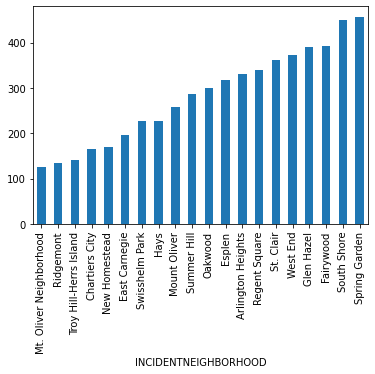

In [54]:
data_frame.head(35).plot.bar()

    The graph above shows our data ploted from least to greatest after our data is cleaned and instances are counted for each neighborhood. 

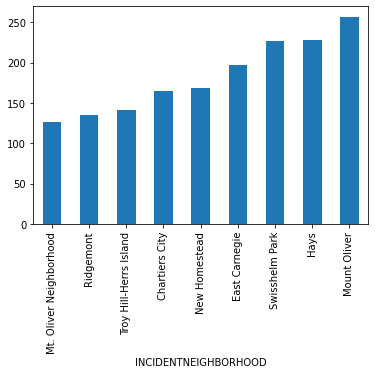

In [55]:
data_frame.head(9).plot.bar()

**Conclusion**

    The graph above shows the top 10 safest neighborhoods by lowest amount of reported crime for better visualization. Mt. Oliver, Ridgemont and Troy Hill-Herrs are in the top 3 respectively.